<h1>Introduction</h1>
<p>In these lab notes we will introduce you to Naïve Bayes and your task is to implement a relatively simple spam filter.  We will use a small data set to train and test the model (available on Blackboard). </p> 

<b>Note:</b>  Use Jupyter Notebook or Google Colab (NOT Jupyter Lab).
    
<p>The messages within the datasets have already been classified as spam, or ham (not spam). </p> 

<p>The implementation of a Naïve Bayes Spam Filter is relatively straight forward using scikit-learn, however, this library hides the implementation details (and many solutions are available on the Internet).  Therefore, this task does not permit the use of the scikit-learn library or similar libraries that perform similar tasks.  We hope that this will help with your understanding of the implementation details.</p> 
<p>Bayes Theorem can give us the probability that a message is spam S for a given event E</p>

# Bayes' Theorem for Spam Classification

The equation for calculating the probability that a message is spam given an event has occurred can be expressed as:

$$P\left(S\middle|\ E\right)=\frac{P\left(E\middle|\ S\right)P\left(S\right)}{P\left(E\middle|\ S\right)P\left(S\right)+P\left(E|\lnot S\right)P\left(\lnot S\right)}$$

Where:

- $P\left(S\middle|\ E\right)$ is the probability that the message is spam given the event occurred.
- $P\left(S\right)$ is the prior probability that a message is spam.
- $P\left(\lnot S\right)$ is the prior probability that a message is not spam.

Note: $P\left(S\right)$ and $P\left(\lnot S\right)$ are prior values, or prior beliefs. This value could be calculated using the number of spam and number of ham classifications in the data set. You could also use arbitrary values, for example; you could assume that of all email messages sent, 80% of them are spam and 20% of them are not spam. The success of the filter depends on the prior values.

- $P\left(E\middle|\ S\right)$ is the probability that event E occurs in spam emails.
- $P\left(E|\lnot S\right)$ is the probability that event E occurs in non-spam emails.


<h3>Additional Libraries</h3>
<p>As you progress through the exercises you may need additional libraries that are not installed, for example when visualising the data you may need to import WordCloud.  If you use [Google Colaboratory](https://colab.research.google.com/notebooks/intro.ipynb) the necessary libraries will be available, which will save you having to pip install.  </p>
<h3>The Implementation</h3>
<p>We have tried to keep the implementation quite simple and therefore not accounted for things like filtering small often used words, nor does the implementation calculate probabilities of a word in the frequency list not appearing in spam.  We have also filtered things like telephone numbers, which could be used to identify spam.   The final exercise allows you to make recommendations how the model could be improved.    </p>


<h3>1.  Read the dataset into a dataframe and explore</h3>
<p>Start by importing pandas and read the dataset into a DataFrame named df.  Output the first 20 rows of the dataframe to get a general feel of how the data is structured.</p>
<p>You may encounter the error: UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 135-136: invalid continuation byte.  You don't need to edit the datafile,  as you should be able to successfully read in the datafile by changing the encoding to latin-1.</p>
<p>[1 Mark]</p>

In [1]:
import pandas as pd
import numpy as np
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import *

df = pd.read_csv('spam.csv', encoding='latin-1')

df.head(20)


C:\Users\Muhammad\AppData\Local\Temp\ipykernel_14980\376365734.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


<h3>2. Clean the data</h3>
<p>We are only interested in words, clean the data so that all punctuations are removed.  You should be left with a dataset that only contains alpha characters (including spaces).  You should also ensure all the words are lowercase.  Store the cleaned data into a DataFrame named clean.</p>

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Category</th>
      <th>Message</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>ham</td>
      <td>go until jurong point crazy available only in ...</td>
    </tr>
    <tr>
      <th>1</th>
      <td>ham</td>
      <td>ok lar joking wif u oni</td>
    </tr>
    <tr>
      <th>2</th>
      <td>spam</td>
      <td>free entry in  a wkly comp to win fa cup final...</td>
    </tr>
    <tr>
      <th>3</th>
      <td>ham</td>
      <td>u dun say so early hor u c already then say</td>
    </tr>
    <tr>
      <th>4</th>
      <td>ham</td>
      <td>nah i dont think he goes to usf he lives aroun...</td>
    </tr>
  </tbody>
</table>

[1 Marks]

In [2]:
df.rename(columns={'v1': 'Category'}, inplace=True)
df.rename(columns={'v2': 'Message'}, inplace=True)
clean = df[['Category','Message']].copy()
clean['Message'] = clean['Message'].str.lower()
clean['Message'] = clean['Message'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

clean.head(20)

,Category,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...
5,spam,freemsg hey there darling its been 3 weeks now...
6,ham,even my brother is not like to speak with me t...
7,ham,as per your request melle melle oru minnaminun...
8,spam,winner as a valued network customer you have b...
9,spam,had your mobile 11 months or more u r entitled...


<h3>3. Split the Data</h3>
<p>Split the data into three random samples, one for training the model, one for validation and the other for testing the model.  Create DataFrames named train_data, validation_data and test_data.  The train_data DataFrame should contain 60-70% of the data, validation_data 15-20% and the test_data DataFrame the remaining data.<p>  

<p>[1 Mark]</p>

In [3]:
new_index = np.random.permutation(clean.index)
clean = clean.iloc[new_index]
clean.index = range(0, len(df))

num_entries = len(clean)
training_amount = int(num_entries * 0.7)
validation_amount = int(num_entries * 0.2)
testing_amount = int(num_entries * 0.1)

header = clean.iloc[0]
data = clean.iloc[1:]

train_data = pd.concat([header.to_frame().transpose(), data.iloc[:training_amount]])
validation_data = pd.concat([header.to_frame().transpose(), data.iloc[training_amount:training_amount + validation_amount]])
test_data = pd.concat([header.to_frame().transpose(), data.iloc[training_amount + validation_amount:]])

<h3>4. Create a Word Frequency DataFrame</h3>
<p>Create a new DataFrame named word_freq that contains each word with the number of times it appears in a spam and a ham message.  You should use the train_data.</p>
<p>Below is an example of what the DataFrame would look like, <i>note</i> that your values may differ depending on how the data was split.</p>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Word</th>
      <th>#Spam</th>
      <th>#Ham</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>0</td>
      <td>go</td>
      <td>27</td>
      <td>196</td>
    </tr>
    <tr>
      <td>1</td>
      <td>until</td>
      <td>4</td>
      <td>17</td>
    </tr>
    <tr>
      <td>2</td>
      <td>jurong</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>3</td>
      <td>point</td>
      <td>1</td>
      <td>9</td>
    </tr>
    <tr>
      <td>4</td>
      <td>crazy</td>
      <td>4</td>
      <td>8</td>
    </tr>
    <tr>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <td>7253</td>
      <td>salesman</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>7254</td>
      <td>pity</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>7255</td>
      <td>soany</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>7256</td>
      <td>suggestions</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>7257</td>
      <td>bitching</td>
      <td>1</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
<p>[2 Marks]</p>

In [4]:
ham_messages = train_data[train_data['Category'] == 'ham']['Message']
spam_messages = train_data[train_data['Category'] == 'spam']['Message']

def tokenize_and_filter(text):
    words = re.findall(r'\b[a-zA-Z]+\b', text)
    return words

ham_words = pd.Series(' '.join(ham_messages).lower()).apply(tokenize_and_filter).explode()
spam_words = pd.Series(' '.join(spam_messages).lower()).apply(tokenize_and_filter).explode()

word_freq = pd.DataFrame({'ham': ham_words.value_counts(), 'spam': spam_words.value_counts()}).fillna(0)
word_freq = word_freq.sort_values(by=['ham', 'spam'], ascending=False)

word_freq['total'] = word_freq['ham'] + word_freq['spam']

# sets the threshold to remove the words that appear too frequently. only shows words with less than 300 occurences in the train dataset
threshold = 300
too_frequent_words = word_freq[word_freq['total'] > threshold].index
word_freq = word_freq[~word_freq.index.isin(too_frequent_words)]

word_freq

,ham,spam,total
but,295.0,5.0,300.0
at,264.0,18.0,282.0
will,246.0,25.0,271.0
can,246.0,24.0,270.0
do,244.0,19.0,263.0
...,...,...,...
yards,0.0,1.0,1.0
ymca,0.0,1.0,1.0
yohere,0.0,1.0,1.0
youto,0.0,1.0,1.0


<h3>5. Visualise the Data</h3>
<p>Let's use a Word Cloud library to visualise the most common words contained in spam messages.</p>

[Example of a Word Cloud Image](https://drive.google.com/open?id=1lVRGHtMB1AMJf-JSi7MmcHbZB_BvBhGC)

<p>[1 Marks]</p>



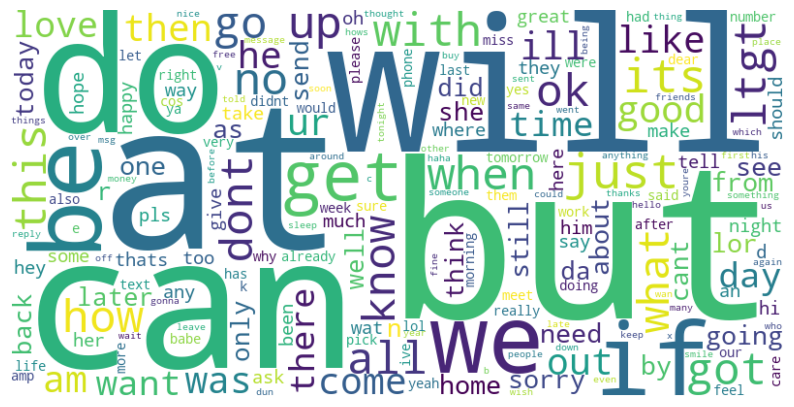

In [5]:
word_freq_dict = word_freq.to_dict()[word_freq.columns[0]]

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<h3>6.  Calculate $P\left(E\middle| S\right)$ and $P\left(E|\lnot S\right)$</h3>
<p>Next create a new DataFrame named word_prob that gives the probability of each word being found in a spam and ham message.</p>
<p>To calculate the probability of a word being spam you divide the number of times the word was found in spam by the total number of spam messages, likewise to calculate the probability of each word being found in a ham message you divide the number of times the word was found in a ham message by the total number of ham messages.</p>
<p>If a word was not found in ham or spam it will cause problems later because the probability calculated will be zero. Therefore, use a pseudocount k and estimate the probability of seeing the word. This is known as smoothing and results in the following formula when k = 0.5, for example.</p>
<p>$P\left(E\middle| S\right)$ = (number of spams containing the word + k) / (total number of spam messages + 2 * k).</p>
<p>Likewise, for $P\left(E|\lnot S\right)$.</p>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Word</th>
      <th>P(E|S)</th>
      <th>P(E|¬S)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>go</td>
      <td>0.053322</td>
      <td>0.050055</td>
    </tr>
    <tr>
      <th>1</th>
      <td>until</td>
      <td>0.011364</td>
      <td>0.004275</td>
    </tr>
    <tr>
      <th>2</th>
      <td>jurong</td>
      <td>0.002622</td>
      <td>0.000138</td>
    </tr>
    <tr>
      <th>3</th>
      <td>point</td>
      <td>0.002622</td>
      <td>0.002344</td>
    </tr>
    <tr>
      <th>4</th>
      <td>crazy</td>
      <td>0.011364</td>
      <td>0.002344</td>
    </tr>
  </tbody>
</table>
</p>[2 Marks]</p>


In [6]:
total_spam_words = word_freq['spam'].sum()
total_ham_words = word_freq['ham'].sum()

# smoothing
k = 0.5
word_freq['P(E|S)'] = (word_freq['spam'].where(word_freq['spam'] != 0, k) + k) / (total_spam_words + 2 * k)
word_freq['P(E|¬S)'] = (word_freq['ham'].where(word_freq['ham'] != 0, k) + k) / (total_ham_words + 2 * k)

word_prob = pd.DataFrame({
    '': range(0, len(word_freq)),
    'word': word_freq.index,
    'P(E|S)': word_freq['P(E|S)'],
    'P(E|¬S)': word_freq['P(E|¬S)']
})

word_prob

,,word,P(E|S),P(E|¬S)
but,0,but,0.000724,0.008872
at,1,at,0.002435,0.007941
will,2,will,0.003356,0.007401
can,3,can,0.003225,0.007401
do,4,do,0.002566,0.007341
...,...,...,...,...
yards,6623,yards,0.000197,0.000030
ymca,6624,ymca,0.000197,0.000030
yohere,6625,yohere,0.000197,0.000030
youto,6626,youto,0.000197,0.000030


<h3>7. Checking the 'spamliness' of a single word</h3>
<p>Now that we have trained the model, we will test the model.  Before we use the test_data, first let’s check how the model calculates the spamliness of a single word.  This is where we use the Bayes Theorem formula.  We have already calculated $P\left(E\middle| S\right)$ and $P\left(E|\lnot S\right)$, so we can just extract these values from the word_prob DataFrame.</p>
<p>We need to decide on the prior values $P\left(S\right)$ and $P\left(\lnot S\right)$, this is where you can experiment and tweak the model, in this example the prior value for spam was set to $0.4$ and the prior value for not spam or ham was set to $0.6$.</p>
<h3>
$P\left(S\middle|\ E\right)=\frac{P\left(E\middle|\ S\right)P\left(S\right)}{P\left(E\middle|\ S\right)P\left(S\right)+P\left(E|\lnot S\right)P\left(\lnot S\right)}$
</h3>
<pre>
Output
Word = ['free']
P(E|S) = [0.29108392]
P(E|¬S) = [0.01365141]
P(S|E) = [0.93427577]
P(¬S|E) = [0.06572423]
</pre>

<p>[2 Marks]</p>

In [7]:
word = word_prob.iloc[0]['word']

P_E_given_S = word_prob.loc[word, 'P(E|S)']
P_E_given_not_S = word_prob.loc[word, 'P(E|¬S)']

P_S = 0.4
P_not_S = 0.6

P_S_given_E = (P_E_given_S * P_S) / (P_E_given_S * P_S + P_E_given_not_S * P_not_S)
P_not_S_given_E = 1 - P_S_given_E

def bayesProbability(word):
    P_E_given_S = word_prob.loc[word, 'P(E|S)'] 
    P_E_given_not_S = word_prob.loc[word, 'P(E|¬S)']

    P_S = 0.4
    P_not_S = 0.6

    P_S_given_E = (P_E_given_S * P_S) / (P_E_given_S * P_S + P_E_given_not_S * P_not_S)
    P_not_S_given_E = 1 - P_S_given_E

    return P_E_given_S, P_E_given_not_S, P_S_given_E, P_not_S_given_E

P_E_given_S, P_E_given_not_S, P_S_given_E, P_not_S_given_E = bayesProbability(word)

print("Word =", word)
print("P(E|S) =", P_E_given_S)
print("P(E|¬S) =", P_E_given_not_S)
print("P(S|E) =", P_S_given_E)
print("P(¬S|E) =", P_not_S_given_E)

Word = but
P(E|S) = 0.0007238747038694393
P(E|¬S) = 0.008871742524318483
P(S|E) = 0.05158930247260812
P(¬S|E) = 0.9484106975273918


<h3>8. Checking the 'spamliness' of several words</h3>
<p>To check the spamliness of several words contained in a message we multiply the probabilities.  The model assumes the words appear as independent events hence the naïve Bayes.  In reality of course, words are not independent events, but the model still performs well.  So we use the assumption that the words appear independently, and hence we multiply probabilities, so
$P(S\,|\, x_1,\dots,x_n)\approx \frac{P(S)\underset{i=1}{\overset{n}{\prod}}P(x_i | S)}{P(S)\underset{i=1}{\overset{n}{\prod}}P(x_i | S)+P(\neg S)\underset{i=1}{\overset{n}{\prod}}P(x_i | \neg S)}$

Calculate the probability for each word in a message being spam, you might want to store the calculations in a list named prob_spam.  Likewise create a list for each word not being spam.
Then multiply the probabilities and compare the results.  If the result of multiplying the probabilities for spam is greater than the result of multiplying the probabilities for not spam, then you assume the message as spam.
</p>
<p>If you have a word in your message that is not in the word_prob DataFrame then you can't get the probability.  Skip any words in the message that are not in the word_prob DataFrame.</p>
<p>[2 Marks]</p>

In [8]:
for message in train_data["Message"]:
    print("Message is: " + message)
    split_message = message.split(" ")

    prob_spam = []
    prob_not_spam = []
    prob_spam_mult = 1
    prob_not_spam_mult = 1

    for word in split_message:
        word = word.strip()
        if word in word_prob['word'].values:
            P_E_given_S, P_E_given_not_S, P_S_given_E, P_not_S_given_E = bayesProbability(word)
            prob_spam.append(P_E_given_S)
            prob_not_spam.append(P_E_given_not_S)

            for prob in prob_spam:
                prob_spam_mult = prob

            for prob in prob_not_spam:
                prob_not_spam_mult= prob

    print("Probability of spam is " + str(prob_spam_mult))
    print("Probability of not spam is " + str(prob_not_spam_mult))
    if prob_not_spam_mult < prob_spam_mult:
        print("The message is classified as spam.")
    else:
        print("The message is classified as not spam.")
    print("")

Message is: if you want to mapquest it or something look up usf dogwood drive
Probability of spam is 0.00013161358252171624
Probability of not spam is 0.0004053080341059205
The message is classified as not spam.

Message is: dont think about what u have got think about how to use it that you have got good ni8
Probability of spam is 0.0007238747038694393
Probability of not spam is 0.005028821904647532
The message is classified as not spam.

Message is: no callsmessagesmissed calls
Probability of spam is 0.0012503290339563042
Probability of not spam is 0.0003752852167647412
The message is classified as spam.

Message is: ill text carlos and let you know hang on
Probability of spam is 0.00013161358252171624
Probability of not spam is 4.503422601176894e-05
The message is classified as spam.

Message is: did you get any gift this year i didnt get anything so bad
Probability of spam is 0.00019742037378257435
Probability of not spam is 0.0007355590248588927
The message is classified as not sp

<h3>9. Avoiding floating point underflow</h3>
<p>Our aim is to compare two probabilities $P(S|x_1,\dots,x_n)$ with $P(\neg S|x_1,\dots,x_n),$ according to our model introduced in Section 8, both probabilities share a common denominator which does not affect comparison. Hence we will calculate numerators only, which are proportional to $P(S|x_1,\dots,x_n)$ and $P(\neg S|x_1,\dots,x_n).$
</p>

<p>Multiplying a set of small probabilities could result in a floating-point error.  This is where the product becomes too small to be represented correctly.  To avoid this we can take the logarithm of the probabilities and add them.  

To avoid multiplication of small numbers, we use the following property of $\log(x):$</p>
$$
\log(a\cdot b)=\log(a)+\log(b)
$$
<p>i.e. the log of the product is equal to the sum of logs (so instead of multiplying small numbers we will add them):</p>
$$
P(S|x_1,x_2,\dots,x_n)\propto P(S)\cdot P(x_1|S)\cdot \dots \cdot P(x_n|S)$$
<p>becomes</p>
$$\log(P(S|x_1,x_2,\dots,x_n))\propto \log\left(P(S)\cdot P(x_1|S)\cdot \dots  P(x_n|S)\right)=$$ $$
\log(P(S))+\log(P(x_1|S))+\dots+\log(P(x_n|S))
$$
<p>So, to check spam or ham we just compare:</p>
$$
\log(P(S))+\log(P(x_1|S))+\dots+\log(P(x_n|S))
$$
<p>and </p>
$$
\log(P(\neg S))+\log(P(x_1|\neg S))+\dots+\log(P(x_n|\neg S))
$$


Change the equation so that logs are used.
</p>
<p>[2 Mark]</p>

In [9]:
# rewrite bayes function for the log version
def logBayesProbability(word):
    P_E_given_S = word_prob.loc[word, 'P(E|S)']
    P_E_given_not_S = word_prob.loc[word, 'P(E|¬S)']

    P_S = 0.4
    P_not_S = 0.6

    log_P_E_given_S = np.log(P_E_given_S)
    log_P_E_given_not_S = np.log(P_E_given_not_S)
    log_P_S = np.log(P_S)
    log_P_not_S = np.log(P_not_S)

    log_P_S_given_E = log_P_E_given_S + log_P_S
    log_P_not_S_given_E = log_P_E_given_not_S + log_P_not_S

    return log_P_S_given_E, log_P_not_S_given_E

for message in train_data["Message"]:
    print("Message is: " + message)
    split_message = message.split(" ")

    log_prob_spam = 0
    log_prob_not_spam = 0

    for word in split_message:
        word = word.strip()
        if word in word_prob['word'].values:
            log_P_S_given_E, log_P_not_S_given_E = logBayesProbability(word)
            log_prob_spam += log_P_S_given_E
            log_prob_not_spam += log_P_not_S_given_E

    print("Log probability of spam is " + str(log_prob_spam))
    print("Log probability of not spam is " + str(log_prob_not_spam))
    if log_prob_not_spam < log_prob_spam:
        print("The message is likely spam.")
    else:
        print("The message is likely not spam.")
    print("")

Message is: if you want to mapquest it or something look up usf dogwood drive
Log probability of spam is -78.58529877689699
Log probability of not spam is -70.14768122976632
The message is likely not spam.

Message is: dont think about what u have got think about how to use it that you have got good ni8
Log probability of spam is -87.71437005073837
Log probability of not spam is -67.43929623165798
The message is likely not spam.

Message is: no callsmessagesmissed calls
Log probability of spam is -23.531740460164045
Log probability of not spam is -23.771589038513987
The message is likely spam.

Message is: ill text carlos and let you know hang on
Log probability of spam is -51.31671176017434
Log probability of not spam is -44.727144410203124
The message is likely not spam.

Message is: did you get any gift this year i didnt get anything so bad
Log probability of spam is -78.06131186514682
Log probability of not spam is -68.00852556878661
The message is likely not spam.

Message is: yup

<h3>10. Testing the Model</h3>
<p>Now that we have tested the model using simple messages.  Let’s test the model using the messages from the test_set.  You should implement counters that displays how your model has performed and calculate the accuracy of the model.</p>
<pre>
match_spam 173
match_ham 843
thought_ham_is_spam 3
thought_spam_is_ham 357
Accuracy: 0.7383720930232558
</pre>
<p>[3 Marks]</p>


In [10]:
match_spam_count = 0
match_ham_count = 0
thought_ham_is_spam = 0
thought_spam_is_ham = 0

for index, row in test_data.iterrows():
    category = row["Category"]
    message = row["Message"]
    split_message = message.split(" ")

    log_prob_spam = 0
    log_prob_not_spam = 0

    for word in split_message:
        word = word.strip()
        if word in word_prob['word'].values:
            log_P_S_given_E, log_P_not_S_given_E = logBayesProbability(word)
            log_prob_spam += log_P_S_given_E
            log_prob_not_spam += log_P_not_S_given_E

    # message calculated to be spam
    if log_prob_not_spam < log_prob_spam:
        if (category == "spam"):
            match_spam_count += 1
        else:
            thought_ham_is_spam += 1
    # message calculated to be ham
    else:
        if (category == "ham"):
            match_ham_count += 1
        else:
            thought_spam_is_ham += 1

total_predictions = match_spam_count + match_ham_count + thought_ham_is_spam + thought_spam_is_ham
accuracy = (match_ham_count + match_spam_count) / total_predictions

print("match_spam: " + str(match_spam_count))
print("match_ham: " + str(match_ham_count))
print("thought_ham_is_spam: " + str(thought_ham_is_spam))
print("thought_spam_is_ham: " + str(thought_spam_is_ham))
print("Accuracy: " + str(accuracy))

match_spam: 58
match_ham: 474
thought_ham_is_spam: 21
thought_spam_is_ham: 5
Accuracy: 0.953405017921147


<h3>11. Improvements</h3>
<p>Utilise the validation set to assess the performance of various word sets in classifying spam and non-spam (ham) emails. Compare the effectiveness of different sets of words to determine their impact on classification accuracy.</p>
<p>[3 Mark]</p>

In [11]:
# this one improves the accuracy of identifying spam/ham emails by removing the words that appear less than 3 times
# in spam and 0 times in ham and vice versa: less than 3 times in ham and 0 times in spam
# if you compare using the same dataset from before and this method, this one has a bump in accuracy

match_spam_count = 0
match_ham_count = 0
thought_ham_is_spam = 0
thought_spam_is_ham = 0

for index, row in validation_data.iterrows():
    category = row["Category"]
    message = row["Message"]
    split_message = message.split(" ")

    log_prob_spam = 0
    log_prob_not_spam = 0

    for word in split_message:
        word = word.strip()
        if word in word_freq.index:
            spam_count = word_freq.loc[word, 'spam']
            ham_count = word_freq.loc[word, 'ham']
            
            # skips over outlier words
            if (spam_count == 0 and ham_count < 3) or (ham_count == 0 and spam_count < 3):
                continue
            
            log_P_S_given_E, log_P_not_S_given_E = logBayesProbability(word)
            log_prob_spam += log_P_S_given_E
            log_prob_not_spam += log_P_not_S_given_E

    # message calculated to be spam
    if log_prob_not_spam < log_prob_spam:
        if category == "spam":
            match_spam_count += 1
        else:
            thought_ham_is_spam += 1
    # message calculated to be ham
    else:
        if category == "ham":
            match_ham_count += 1
        else:
            thought_spam_is_ham += 1

total_predictions = match_spam_count + match_ham_count + thought_ham_is_spam + thought_spam_is_ham
accuracy = (match_ham_count + match_spam_count) / total_predictions

print("match_spam:", match_spam_count)
print("match_ham:", match_ham_count)
print("thought_ham_is_spam:", thought_ham_is_spam)
print("thought_spam_is_ham:", thought_spam_is_ham)
print("Accuracy:", accuracy)


match_spam: 144
match_ham: 942
thought_ham_is_spam: 17
thought_spam_is_ham: 12
Accuracy: 0.9739910313901345
